In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [3]:
df=pd.read_csv("/content/BEXIMCO.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE  LTP*  ...   YCP   TRADE  VALUE (mn)     VOLUME
0  439 2018-05-08      BEXIMCO  24.9  ...  25.4  1816.0      90.461  3600335.0
1  438 2018-06-08      BEXIMCO  25.0  ...  25.0   917.0      45.987  1842571.0
2  437 2018-07-08      BEXIMCO  25.0  ...  25.0   759.0      30.122  1205502.0
3  436 2018-08-08      BEXIMCO  24.9  ...  25.0   884.0      49.327  1970165.0
4  435 2018-09-08      BEXIMCO  24.8  ...  24.9   897.0      43.200  1736595.0

[5 rows x 12 columns]

In [4]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()


#       DATE TRADING CODE  LTP*  ...   YCP   TRADE  VALUE (mn)     VOLUME
36  403 2018-01-10      BEXIMCO  24.1  ...  23.9   645.0      22.999   951654.0
59  380 2018-01-11      BEXIMCO  24.3  ...  24.6  1453.0      91.217  3757631.0
37  402 2018-02-10      BEXIMCO  23.9  ...  24.0   616.0      21.479   893881.0
79  360 2018-02-12      BEXIMCO  21.8  ...  21.9   962.0      38.681  1777123.0
16  423 2018-03-09      BEXIMCO  26.0  ...  26.3  1647.0      88.152  3383219.0

[5 rows x 12 columns]

In [5]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE  LTP*  HIGH  ...   YCP   TRADE  VALUE (mn)     VOLUME
DATE                                      ...                                     
2018-01-10  403      BEXIMCO  24.1  24.5  ...  23.9   645.0      22.999   951654.0
2018-01-11  380      BEXIMCO  24.3  24.8  ...  24.6  1453.0      91.217  3757631.0
2018-02-10  402      BEXIMCO  23.9  24.3  ...  24.0   616.0      21.479   893881.0

[3 rows x 11 columns]

In [6]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [7]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [8]:
df['volatility'] = df['volatility']*100

In [9]:
import matplotlib.pyplot as plt 

In [10]:
df=df.reset_index()['volatility']

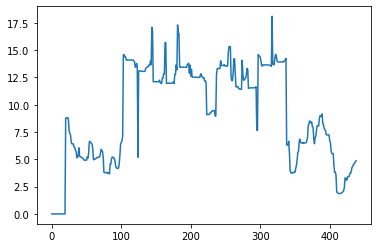

In [11]:
plt.plot(df)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [13]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:

print(X_train.shape), print(y_train.shape)

(206, 100)
(206,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
X_test.shape

(31, 100, 1)

In [19]:
from google.colab import drive

In [20]:
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
filepath1 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsBeximco/model1.h5"
filepath2 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsBeximco/model2.h5"
filepath3 = "/content/drive/MyDrive/StockPriceEnsembleDL/modelsBeximco/model3.h5"

In [22]:

#1D cnn model
# define model
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')
model1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)


Epoch 1/100
7/7 [==============================] - 1s 44ms/step - loss: 0.1776 - val_loss: 0.0451
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0425 - val_loss: 0.0673
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0336 - val_loss: 0.0430
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0263 - val_loss: 0.0325
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0238 - val_loss: 0.0304
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0154 - val_loss: 0.0312
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0138 - val_loss: 0.0264
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0108 - val_loss: 0.0474
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0080 - val_loss: 0.0412
Epoch 10/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0090 - val_loss: 0.0678
Epoch 11/100
7/7 [=

In [29]:
model1.save(filepath1)

In [30]:
#LSTM  model
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 6s 304ms/step - loss: 0.2688 - val_loss: 0.1306
Epoch 2/100
7/7 [==============================] - 1s 141ms/step - loss: 0.0490 - val_loss: 0.0236
Epoch 3/100
7/7 [==============================] - 1s 141ms/step - loss: 0.0333 - val_loss: 0.0559
Epoch 4/100
7/7 [==============================] - 1s 141ms/step - loss: 0.0165 - val_loss: 0.0813
Epoch 5/100
7/7 [==============================] - 1s 139ms/step - loss: 0.0153 - val_loss: 0.0500
Epoch 6/100
7/7 [==============================] - 1s 139ms/step - loss: 0.0150 - val_loss: 0.0754
Epoch 7/100
7/7 [==============================] - 1s 139ms/step - loss: 0.0128 - val_loss: 0.0796
Epoch 8/100
7/7 [==============================] - 1s 140ms/step - loss: 0.0106 - val_loss: 0.0713
Epoch 9/100
7/7 [==============================] - 1s 140ms/step - loss: 0.0120 - val_loss: 0.0877
Epoch 10/100
7/7 [==============================] - 1s 141ms/step - loss: 0.0109 - val_loss: 0.0826
Epoch 11/

In [31]:
model2.save(filepath2)

In [32]:
#BILSTM model
model3=Sequential()
model3.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))
model3.add(Bidirectional(LSTM(50,return_sequences=True)))
model3.add(Bidirectional(LSTM(50)))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 14s 562ms/step - loss: 0.3102 - val_loss: 0.2443
Epoch 2/100
7/7 [==============================] - 2s 236ms/step - loss: 0.0469 - val_loss: 0.0516
Epoch 3/100
7/7 [==============================] - 2s 239ms/step - loss: 0.0374 - val_loss: 0.1529
Epoch 4/100
7/7 [==============================] - 2s 235ms/step - loss: 0.0221 - val_loss: 0.1180
Epoch 5/100
7/7 [==============================] - 2s 241ms/step - loss: 0.0137 - val_loss: 0.0737
Epoch 6/100
7/7 [==============================] - 2s 242ms/step - loss: 0.0129 - val_loss: 0.1156
Epoch 7/100
7/7 [==============================] - 2s 241ms/step - loss: 0.0100 - val_loss: 0.0852
Epoch 8/100
7/7 [==============================] - 2s 238ms/step - loss: 0.0098 - val_loss: 0.0736
Epoch 9/100
7/7 [==============================] - 2s 240ms/step - loss: 0.0093 - val_loss: 0.0774
Epoch 10/100
7/7 [==============================] - 2s 242ms/step - loss: 0.0077 - val_loss: 0.0661
Epoch 11

In [33]:
model3.save(filepath3)

In [34]:
from keras.models import load_model

In [51]:
# create list of loaded models use  load_model() 
all_models = list()
for i in range(3):
  filename = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsBeximco/model'+str(i+1)+'.h5'
  model = load_model(filename)
  all_models.append(model)

In [52]:
print(len(all_models))

3


In [53]:
# perform test prediction with per models 
#model1
f1 = '/content/drive/MyDrive/StockPriceEnsembleDL/modelsBeximco/model1.h5'
model = load_model(f1)


In [54]:

test_preds = model.predict(X_test)
print(test_preds.shape)
print(type(test_preds))

(31, 1)
<class 'numpy.ndarray'>


In [55]:
test_preds = np.reshape(test_preds,(1, test_preds.size))
test_predict=scaler.inverse_transform(test_preds)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [56]:
#Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_preds))
RMSE

2.8852917824682334

In [57]:

# stacked generalization with linear meta model on blobs dataset
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from keras.models import load_model
from keras.utils import to_categorical
from numpy import dstack

In [58]:
def DataPrep(datax):
  test_preds = np.reshape(datax,(1, datax.size))
  test_predict=scaler.inverse_transform(test_preds)
  return datax



In [59]:
def stacked_dataset(allModels, inputX):
	stackX = None
	for model in allModels:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	
	return stackX

In [60]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LinearRegression()
	model.fit(stackedX, inputy)
	return model

In [61]:
#make prediction with stacked model

def stacked_prediction(members, model, inputX):
  #inputX = DataPrep(inputX)
	stackedX = stacked_dataset(members,inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [62]:
#started from here
for i in range(len(all_models)):
	model = all_models[i]
	for layer in model.layers:
		# make not trainable
		layer.trainable = False
		# rename to avoid 'unique layer name' issue
		layer._name = 'ensemble_' + str(i+1) + '_' + layer.name

In [63]:

# define stacked model from multiple member input models
def define_stacked_model(members):
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(3)(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	# compile
	model.compile(optimizer='adam', loss='mse')
	return model

In [64]:

def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	model.fit(X, inputy, epochs=300, verbose=0)

In [65]:
stacked_model = define_stacked_model(all_models)

In [66]:
#fit stacked model on test dataset
fit_stacked_model(stacked_model, X_test,ytest)

In [67]:

def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X)

In [68]:

# make predictions and evaluate
yhat = predict_stacked_model(stacked_model, X_test)
yhat = DataPrep(yhat)
yhat
#Y_test = DataPrep(Y_test)
#RMSE = math.sqrt(mean_squared_error(Y_test,yhat))
#RMSE
#print('Stacked Test Accuracy: %.3f' % RMSE)

array([[0.17878267, 0.19917697, 0.20550694],
       [0.18091428, 0.1996125 , 0.21462898],
       [0.1796098 , 0.19323948, 0.20550032],
       [0.17841983, 0.18757811, 0.19703113],
       [0.17574954, 0.17492867, 0.18003108],
       [0.17599967, 0.17067122, 0.17840473],
       [0.1735028 , 0.16135497, 0.16239505],
       [0.16786215, 0.1456731 , 0.13011928],
       [0.16626573, 0.14057928, 0.11984883],
       [0.16676798, 0.14109564, 0.12130323],
       [0.16756141, 0.1426644 , 0.12485912],
       [0.16545519, 0.1378964 , 0.11356373],
       [0.16376044, 0.13407643, 0.10483785],
       [0.169411  , 0.14805192, 0.13538305],
       [0.16926438, 0.14837968, 0.13540696],
       [0.17024654, 0.15231612, 0.14171015],
       [0.17079371, 0.15764499, 0.14635234],
       [0.17124727, 0.16191754, 0.1507657 ],
       [0.17281583, 0.16731219, 0.16100965],
       [0.17397124, 0.1713173 , 0.16888534],
       [0.17375052, 0.17247798, 0.1693298 ],
       [0.1776141 , 0.18306431, 0.19117965],
       [0.

In [69]:
yhat=scaler.inverse_transform(yhat)

In [70]:
x, y, z = yhat.T

In [71]:
avg = (x+y+z)/3

In [72]:
avg = np.reshape(avg,(1, avg.size))
x = np.reshape(x,(1, x.size))
y = np.reshape(y,(1, y.size))
z = np.reshape(z,(1, z.size))

In [73]:
RMSE = math.sqrt(mean_squared_error(Y_test,avg))
RMSE

0.7183050453490218

In [74]:
RMSE = math.sqrt(mean_squared_error(Y_test,x))
RMSE

0.9194419575277673

In [75]:
RMSE = math.sqrt(mean_squared_error(Y_test,y))
RMSE

0.6824989419292911

In [76]:
RMSE = math.sqrt(mean_squared_error(Y_test,z))
RMSE

0.6300401776738255

In [77]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,z)
print('MAE: %f' % mae)


MAE: 0.479580
